In [1]:
import sklearn

In [2]:
import sklearn.datasets as datasets

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import metrics

In [5]:
faces_data=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/tatsianasokalava/scikit_learn_data


In [6]:
person_ids, image_array = faces_data['target'], faces_data.images

In [11]:
x=image_array.reshape((len(person_ids), 64*64))


In [13]:
x[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [15]:
print("**Results from Raw Data")
model=KMeans(n_clusters=40)
model.fit(x)
print("cluster goodness:", silhouette_score(x, model.labels_))
print("match to faces:", metrics.adjusted_rand_score(model.labels_, person_ids))

**Results from Raw Data
cluster goodness: 0.1437899
match to faces: 0.4195229653443994


In [17]:
print("**Now using PCA")
pca=PCA(25)
pca.fit(x)
x_reduced=pca.transform(x)
model_reduced=KMeans(n_clusters=40)
model_reduced.fit(x_reduced)
labels_reduced=model_reduced.labels_
print("cluster goodness:", silhouette_score(x_reduced, model_reduced.labels_))
print("match to faces:", metrics.adjusted_rand_score(model_reduced.labels_, person_ids))

**Now using PCA
cluster goodness: 0.23233135
match to faces: 0.46249482596425207


In [18]:
model_reduced

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
labels_reduced

array([22, 10, 22, 14, 26, 30, 22, 22, 22, 27, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 21, 21, 21,  7,  7, 38, 29, 30, 27, 27, 11, 11,  7,  1,
       26, 30,  1, 11, 15, 26,  4,  3,  3,  4, 29, 29, 29, 29, 29, 30, 26,
       26, 26, 16, 16, 16, 16, 16, 16, 16, 17, 17,  6, 17, 17,  6, 17, 17,
        6, 17,  8, 10, 26, 10, 26, 26, 10, 26, 30, 10,  2,  3,  2,  4,  4,
       29, 29, 29,  4,  4,  4, 27, 10, 10, 27, 27, 27, 27, 30, 26,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8, 27,  2,  2,  2,  2, 30,  2, 24, 27,
       27, 11, 11, 29, 29, 11, 26, 30, 29,  4, 11, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 33, 22, 22,
       17, 17, 33, 26, 22, 22, 22, 35, 35, 38, 38, 35, 14, 14, 35, 14, 14,
       26, 26,  6,  4,  6,  6, 26,  6, 26,  6, 39, 39, 39, 32, 32, 39, 32,
       32, 32, 39, 21, 21, 21, 11, 37, 11, 37, 37, 37, 21,  3,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  1,
       26,  4, 29,  4, 29

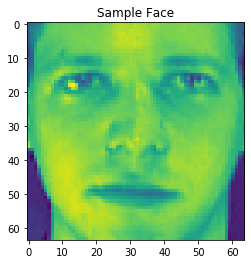

In [25]:
from matplotlib import pyplot as plt
sample_face=image_array[0,:,:]
plt.imshow(sample_face)
plt.title("Sample Face")
plt.show()

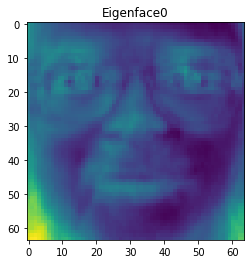

In [26]:
#eigeneface0
eigenface0=pca.components_[0,:].reshape((64,64))
plt.imshow(eigenface0)
plt.title("Eigenface0")
plt.show()

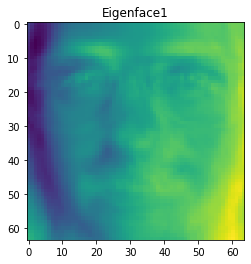

In [27]:
#eigeneface2
eigenface1=pca.components_[1,:].reshape((64,64))
plt.imshow(eigenface1)
plt.title("Eigenface1")
plt.show()

In [28]:
#apply PCA
pca=PCA(25)
pca.fit(x)
x_reduced=pca.transform(x)

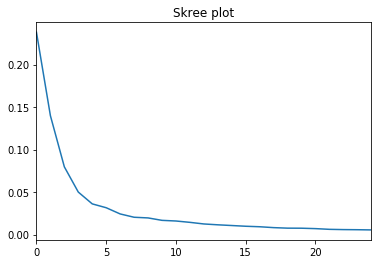

In [32]:
import pandas as pd
pd.Series(pca.explained_variance_ratio_).plot()
plt.title("Skree plot")
plt.show()